In [1]:
import geopandas as gpd
import pandas as pd

In [24]:
path = 'Data/'
pois_file = 'gis_osm_pois_a_free_1.shp'
traffic_file = 'gis_osm_traffic_a_free_1.shp'
places_file = 'gis_osm_places_a_free_1.shp'
roads_file = 'gis_osm_roads_free_1.shp'

In [3]:
pois = gpd.read_file(path + pois_file)

In [4]:
pois.head()

,osm_id,code,fclass,name,geometry
0,3775170,2204,park,Sturgeon Bar,"POLYGON ((-83.18954 42.06989, -83.18944 42.070..."
1,3979646,2255,golf_course,Rosedale Golf Club,"POLYGON ((-79.40029 43.73658, -79.39907 43.736..."
2,3994364,2252,pitch,Diamond 1,"POLYGON ((-80.29569 43.38891, -80.29563 43.389..."
3,3994365,2252,pitch,Diamond 2,"POLYGON ((-80.29536 43.38858, -80.29432 43.388..."
4,3994376,2204,park,Lion's Can-Amera Park,"POLYGON ((-80.29671 43.38923, -80.29664 43.389..."


In [5]:
pois.shape

(84142, 5)

<AxesSubplot:>

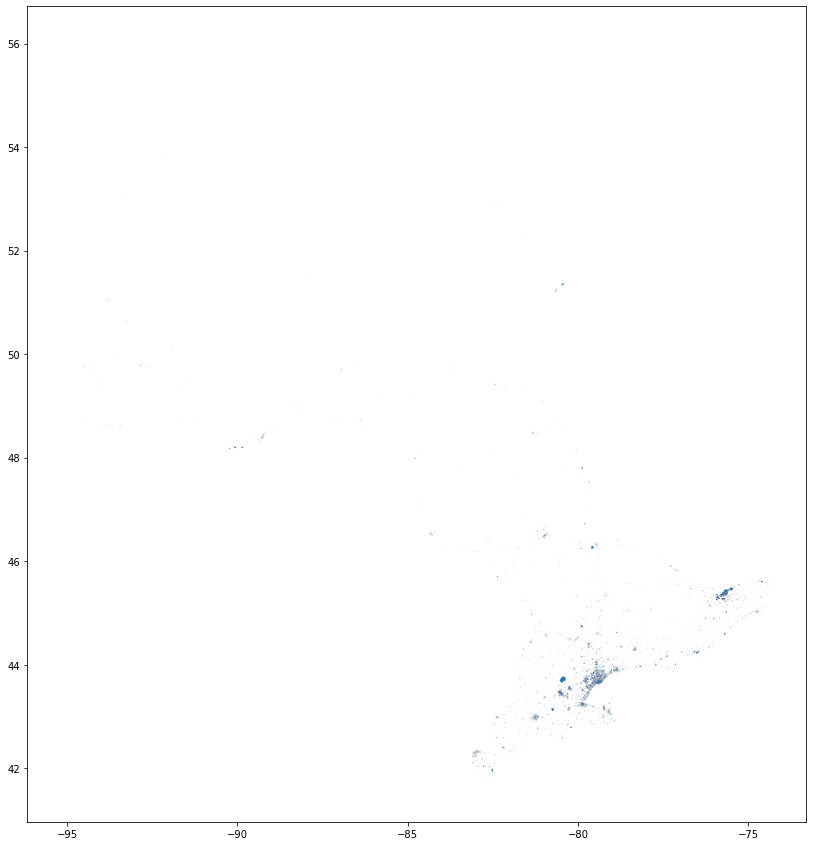

In [6]:
pois.plot(figsize=(15,15))

In [7]:
traffic = gpd.read_file(path + traffic_file)

In [8]:
traffic.head()

,osm_id,code,fclass,name,geometry
0,3796596,5260,parking,None,"POLYGON ((-76.88398 45.62736, -76.88362 45.627..."
1,3994375,5260,parking,None,"POLYGON ((-80.29369 43.38985, -80.29259 43.390..."
2,4075724,5260,parking,None,"POLYGON ((-75.76658 45.34600, -75.76646 45.346..."
3,4075725,5260,parking,None,"POLYGON ((-75.76265 45.34341, -75.76258 45.343..."
4,4075727,5260,parking,None,"POLYGON ((-75.76192 45.34466, -75.76192 45.344..."


In [9]:
traffic.shape

(77827, 5)

<AxesSubplot:>

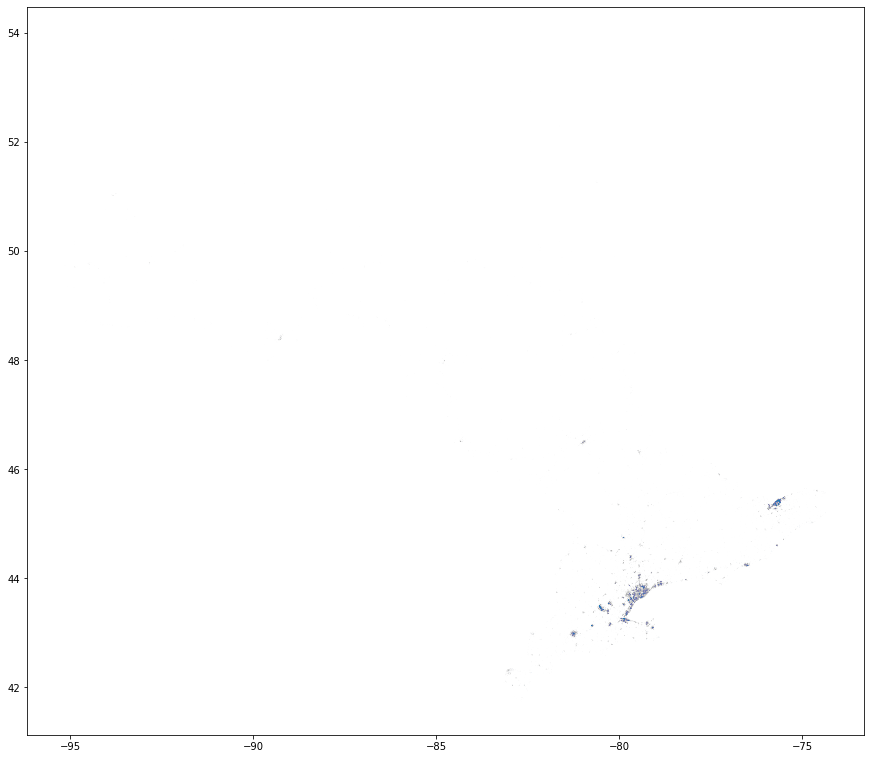

In [10]:
traffic.plot(figsize=(15, 15))

In [11]:
roads = gpd.read_file(path + roads_file)

In [12]:
roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,1296222,5111,motorway,Highway 417,417,F,110,0,F,F,"LINESTRING (-74.44441 45.55219, -74.44994 45.5..."
1,2627409,5115,tertiary,Mount Royal Drive,None,B,0,0,F,F,"LINESTRING (-83.01725 42.25474, -83.01641 42.2..."
2,2627414,5122,residential,Longfellow Avenue,None,B,0,0,F,F,"LINESTRING (-83.01614 42.25493, -83.01537 42.2..."
3,2628245,5122,residential,Ashfield Crescent,None,B,0,0,F,F,"LINESTRING (-83.01424 42.24476, -83.01412 42.2..."
4,2628285,5122,residential,Mitchell Crescent,None,B,0,0,F,F,"LINESTRING (-83.01615 42.24740, -83.01611 42.2..."


In [13]:
roads.shape

(1166175, 11)

<AxesSubplot:>

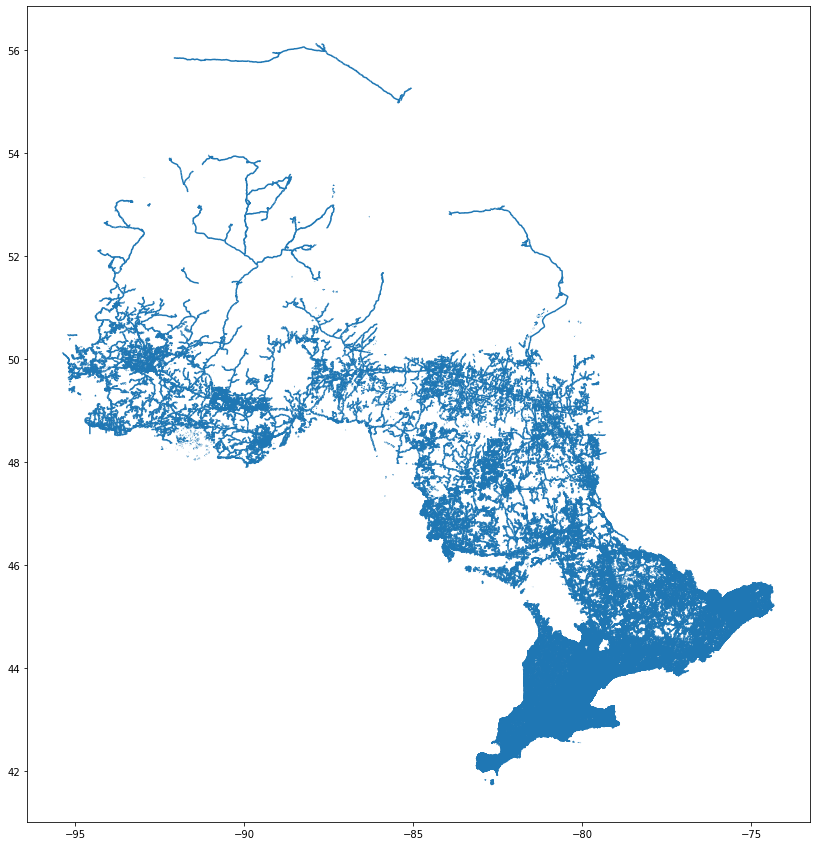

In [14]:
roads.plot(figsize=(15, 15))

In [25]:
places = gpd.read_file(path + places_file)

In [26]:
places.head()

,osm_id,code,fclass,population,name,geometry
0,3743558,1020,island,0,Navy Island,"POLYGON ((-79.02250 43.06122, -79.02250 43.061..."
1,3752102,1020,island,0,None,"POLYGON ((-76.05541 44.31806, -76.05533 44.318..."
2,3752492,1020,island,0,Watch Island,"POLYGON ((-76.02355 44.26929, -76.02355 44.269..."
3,3754044,1020,island,0,Ogden Island,"POLYGON ((-75.24129 44.86380, -75.24093 44.864..."
4,3850126,1020,island,0,Round Island,"POLYGON ((-84.61710 45.83762, -84.61707 45.837..."


In [55]:
places = places.to_crs('proj=cea')
places['area'] = places.area
places = places.rename(columns={'osm_id': 'place_osm_id',
                                 'code': 'place_code',
                                 'fclass': 'place_fclass',
                                 'name': 'place_name',
                                 'area': 'place_area'})


In [56]:
places = places.sort_values(by=['place_name'])
places.place_name.unique()

array(['Action Zone', 'Adelaide Island', 'Adele Island', 'Agawa Island',
       'Ajax', 'Albert Island', 'Alexandria Island', 'Algonquin Island',
       'Allan Island', 'Allie Island', 'Amedroz Island', 'Amherst Island',
       'Amherstburg', 'Amulet Island', 'Angels Island', 'Anguros Island',
       'Annie Island', 'Ardagh Bluffs', 'Armour Island', 'Arnprior',
       'Astrand Island', 'Atikokan', 'Aurora', 'Aylmer', 'Baby Island',
       'Badgeley Island', 'Bala Park Island', 'Banana Island', 'Bancroft',
       'Bare Island', 'Barren Island', 'Barrie', 'Batchawana Island',
       'Bateman Island', 'Battle Island', 'Battleship Island', 'Baudette',
       'Bear Island', 'Bears Rump Island', 'Beaulieu Island',
       'Beausoleil Island', 'Beaver Island', 'Beckwith Island',
       'Bell Island', 'Belle Island', 'Belle Isle', 'Belleville',
       'Berry Island', "Betty's Island", 'Bible Island', 'Big Asp Island',
       'Big Bertha Island', 'Big Charity Island', 'Big Chief Island',
       

<AxesSubplot:>

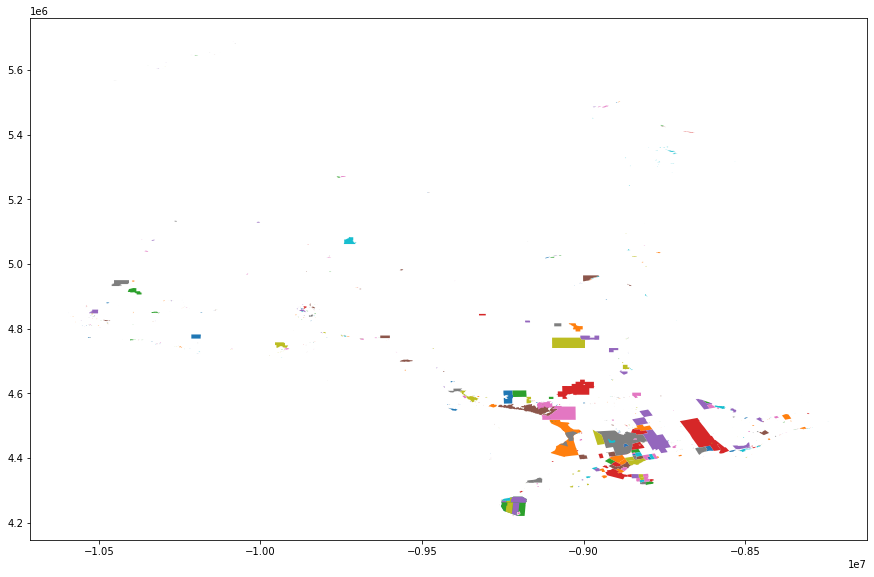

In [57]:
places.plot(figsize=(15, 30), column='place_name')

<AxesSubplot:>

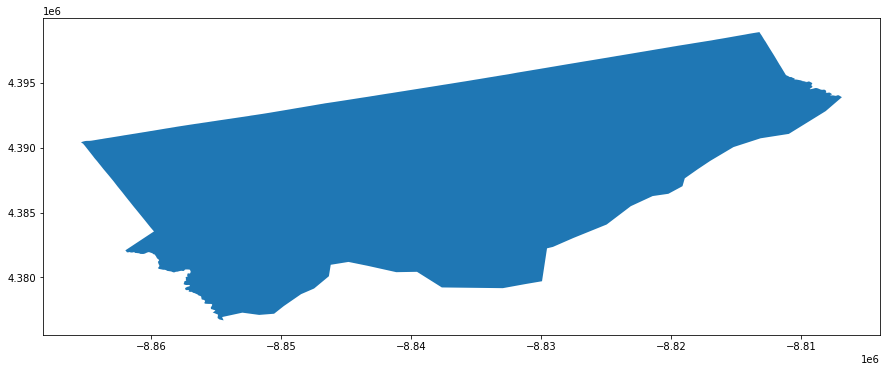

In [58]:
toronto = places.loc[places['place_name'] == 'Toronto']
toronto.plot(figsize=(15, 15))

In [59]:
# Recode Toronto to +proj=cea
toronto

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08


#### Traffic Data Augmentation

1. Get boundaries (linestring) of the polygons to enable geopandas sjoin with roads data.
2. Create column to indicate mini-nodes using Traffic data through ranking of polygon shape (these will have to aggregated post join with roads data).

In [20]:
traffic = traffic.to_crs('+proj=cea')
traffic_crs = traffic.crs
traffic_crs

<Projected CRS: +proj=cea +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
traffic['traffic_area'] = traffic.area
traffic['traffic_zones'] = traffic.geometry
traffic = traffic.sort_values(by='traffic_area', ascending=False) # ordering to the get the biggest traffic zones.
traffic.head(8)

,osm_id,code,fclass,name,geometry,traffic_area,traffic_zones
75984,1060832765,5302,marina,Wye Heritage Marina Resort,"POLYGON ((-8889454.918 4470121.913, -8889454.7...",327318.670044,"POLYGON ((-8889454.918 4470121.913, -8889454.7..."
63315,727158420,5302,marina,Outer Harbour Marina,"POLYGON ((-8831082.572 4381462.418, -8831076.5...",294417.553335,"POLYGON ((-8831082.572 4381462.418, -8831076.5..."
609,28530164,5260,parking,Canada's Wonderland Parking Lot,"POLYGON ((-8854334.075 4398214.707, -8854327.4...",257642.061954,"POLYGON ((-8854334.075 4398214.707, -8854327.4..."
76004,1062240099,5260,parking,None,"POLYGON ((-8851687.721 4396894.442, -8851652.6...",256684.972682,"POLYGON ((-8851687.721 4396894.442, -8851652.6..."
64970,772007804,5302,marina,Royal Canadian Yacht Club,"POLYGON ((-8835643.911 4380066.411, -8835578.2...",185930.243520,"POLYGON ((-8835643.911 4380066.411, -8835578.2..."
70717,877997887,5260,parking,None,"POLYGON ((-8874037.413 4337228.872, -8873754.5...",152567.643006,"POLYGON ((-8874037.413 4337228.872, -8873754.5..."
16228,242901866,5251,service,Ingersoll ONroute,"POLYGON ((-8996802.774 4334209.518, -8996747.8...",151683.967567,"POLYGON ((-8996802.774 4334209.518, -8996747.8..."
42959,425342857,5302,marina,Crysler Park Marina,"POLYGON ((-8359544.508 4484808.952, -8359395.8...",146524.237724,"POLYGON ((-8359544.508 4484808.952, -8359395.8..."


In [22]:
traffic.tail(8)

,osm_id,code,fclass,name,geometry,traffic_area,traffic_zones
62268,689550294,5270,parking_bicycle,None,"POLYGON ((-8838299.404 4381624.945, -8838297.1...",4.336244,"POLYGON ((-8838299.404 4381624.945, -8838297.1..."
62636,699218608,5270,parking_bicycle,None,"POLYGON ((-8855039.851 4377650.632, -8855037.5...",4.197633,"POLYGON ((-8855039.851 4377650.632, -8855037.5..."
55085,505709532,5270,parking_bicycle,None,"POLYGON ((-8835340.231 4394200.666, -8835337.3...",3.489347,"POLYGON ((-8835340.231 4394200.666, -8835337.3..."
63394,730895155,5270,parking_bicycle,None,"POLYGON ((-8963555.594 4366928.800, -8963553.9...",2.553997,"POLYGON ((-8963555.594 4366928.800, -8963553.9..."
63499,737312603,5270,parking_bicycle,None,"POLYGON ((-8402884.392 4524915.834, -8402881.9...",1.990120,"POLYGON ((-8402884.392 4524915.834, -8402881.9..."
63502,737312606,5270,parking_bicycle,None,"POLYGON ((-8402891.327 4524914.639, -8402888.9...",1.981948,"POLYGON ((-8402891.327 4524914.639, -8402888.9..."
63500,737312604,5270,parking_bicycle,None,"POLYGON ((-8402886.663 4524915.443, -8402884.3...",1.871612,"POLYGON ((-8402886.663 4524915.443, -8402884.3..."
63501,737312605,5270,parking_bicycle,None,"POLYGON ((-8402888.923 4524915.053, -8402886.6...",1.863440,"POLYGON ((-8402888.923 4524915.053, -8402886.6..."


In [23]:
traffic.shape

(77827, 7)

### Points of Interest
1. Get the centroids of the points of interest as the 'node' or central point of that location.

In [62]:
pois = pois.to_crs('+proj=cea')
pois['pois_centroids'] = pois.centroid.to_crs(epsg=4326)
pois['pois_area'] = pois.area
pois.head()

,osm_id,pois_code,pois_fclass,pois_name,geometry,pois_centroids,pois_area
0,3775170,2204,park,Sturgeon Bar,"POLYGON ((-9260617.288 4253504.462, -9260606.5...",POINT (-83.18861 42.06900),10029.195034
1,3979646,2255,golf_course,Rosedale Golf Club,"POLYGON ((-8838799.974 4389336.665, -8838663.9...",POINT (-79.39077 43.73637),602100.679580
2,3994364,2252,pitch,Diamond 1,"POLYGON ((-8938474.967 4361302.002, -8938468.7...",POINT (-80.29516 43.38912),5892.554854
3,3994365,2252,pitch,Diamond 2,"POLYGON ((-8938438.622 4361274.977, -8938322.8...",POINT (-80.29464 43.38838),5340.462952
4,3994376,2204,park,Lion's Can-Amera Park,"POLYGON ((-8938589.181 4361327.944, -8938581.2...",POINT (-80.29422 43.38868),66474.304997


In [63]:
pois = pois.rename(columns={'fclass': 'pois_fclass',
                            'name': 'pois_name',
                            'code': 'pois_code'})

In [64]:
pois

,osm_id,pois_code,pois_fclass,pois_name,geometry,pois_centroids,pois_area
0,3775170,2204,park,Sturgeon Bar,"POLYGON ((-9260617.288 4253504.462, -9260606.5...",POINT (-83.18861 42.06900),10029.195034
1,3979646,2255,golf_course,Rosedale Golf Club,"POLYGON ((-8838799.974 4389336.665, -8838663.9...",POINT (-79.39077 43.73637),602100.679580
2,3994364,2252,pitch,Diamond 1,"POLYGON ((-8938474.967 4361302.002, -8938468.7...",POINT (-80.29516 43.38912),5892.554854
3,3994365,2252,pitch,Diamond 2,"POLYGON ((-8938438.622 4361274.977, -8938322.8...",POINT (-80.29464 43.38838),5340.462952
4,3994376,2204,park,Lion's Can-Amera Park,"POLYGON ((-8938589.181 4361327.944, -8938581.2...",POINT (-80.29422 43.38868),66474.304997
...,...,...,...,...,...,...,...
84137,1111206115,2204,park,Montmère Park,"POLYGON ((-8399434.300 4525737.240, -8399235.7...",POINT (-75.45219 45.45760),9654.781432
84138,1111220710,2205,playground,None,"POLYGON ((-8877253.344 4381607.219, -8877252.6...",POINT (-79.74566 43.64050),68.567803
84139,1111551669,2206,dog_park,Moreau Park Off-Leash Dog Park,"POLYGON ((-8956929.090 4455245.930, -8956896.2...",POINT (-80.46103 44.56190),2287.912496
84140,1111649334,2504,mall,Kipling-Queensway Mall,"POLYGON ((-8852694.639 4379955.690, -8852657.5...",POINT (-79.52338 43.61971),19629.752452


### Putting together the data for Toronto, the pois and traffic data within it.

In [65]:
toronto

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08


In [47]:
traffic = traffic.rename(columns={'osm_id': 'traffic_osm_id',
                         'fclass': 'traffic_fclass',
                         'name': 'traffic_name'})
traffic

,traffic_osm_id,code,traffic_fclass,traffic_name,geometry,traffic_area,traffic_zones
75984,1060832765,5302,marina,Wye Heritage Marina Resort,"POLYGON ((-8889454.918 4470121.913, -8889454.7...",327318.670044,"POLYGON ((-8889454.918 4470121.913, -8889454.7..."
63315,727158420,5302,marina,Outer Harbour Marina,"POLYGON ((-8831082.572 4381462.418, -8831076.5...",294417.553335,"POLYGON ((-8831082.572 4381462.418, -8831076.5..."
609,28530164,5260,parking,Canada's Wonderland Parking Lot,"POLYGON ((-8854334.075 4398214.707, -8854327.4...",257642.061954,"POLYGON ((-8854334.075 4398214.707, -8854327.4..."
76004,1062240099,5260,parking,None,"POLYGON ((-8851687.721 4396894.442, -8851652.6...",256684.972682,"POLYGON ((-8851687.721 4396894.442, -8851652.6..."
64970,772007804,5302,marina,Royal Canadian Yacht Club,"POLYGON ((-8835643.911 4380066.411, -8835578.2...",185930.243520,"POLYGON ((-8835643.911 4380066.411, -8835578.2..."
...,...,...,...,...,...,...,...
63394,730895155,5270,parking_bicycle,None,"POLYGON ((-8963555.594 4366928.800, -8963553.9...",2.553997,"POLYGON ((-8963555.594 4366928.800, -8963553.9..."
63499,737312603,5270,parking_bicycle,None,"POLYGON ((-8402884.392 4524915.834, -8402881.9...",1.990120,"POLYGON ((-8402884.392 4524915.834, -8402881.9..."
63502,737312606,5270,parking_bicycle,None,"POLYGON ((-8402891.327 4524914.639, -8402888.9...",1.981948,"POLYGON ((-8402891.327 4524914.639, -8402888.9..."
63500,737312604,5270,parking_bicycle,None,"POLYGON ((-8402886.663 4524915.443, -8402884.3...",1.871612,"POLYGON ((-8402886.663 4524915.443, -8402884.3..."


In [60]:
toronto_traffic = gpd.sjoin(toronto, traffic, how='inner').sort_values(by='traffic_area', ascending=False)

In [61]:
toronto_traffic

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area,index_right,traffic_osm_id,code,traffic_fclass,traffic_name,traffic_area,traffic_zones
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,63315,727158420,5302,marina,Outer Harbour Marina,294417.553335,"POLYGON ((-8831082.572 4381462.418, -8831076.5..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,64970,772007804,5302,marina,Royal Canadian Yacht Club,185930.243520,"POLYGON ((-8835643.911 4380066.411, -8835578.2..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,65569,11017233,5302,marina,Toronto Island Marina,119752.608555,"POLYGON ((-8837022.847 4380343.389, -8836966.0..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,51091,466756636,5302,marina,None,102491.577282,"POLYGON ((-8847971.932 4379661.361, -8847956.0..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,12037,193043985,5302,marina,Island Yacht Club,92183.260608,"POLYGON ((-8837479.547 4380346.611, -8837456.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,62267,689550293,5270,parking_bicycle,None,6.591733,"POLYGON ((-8838339.490 4381622.626, -8838337.3..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,68298,813652630,5270,parking_bicycle,None,6.212512,"POLYGON ((-8846031.990 4381234.963, -8846028.2..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,62268,689550294,5270,parking_bicycle,None,4.336244,"POLYGON ((-8838299.404 4381624.945, -8838297.1..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,62636,699218608,5270,parking_bicycle,None,4.197633,"POLYGON ((-8855039.851 4377650.632, -8855037.5..."


In [77]:
toronto_traffic = toronto_traffic.drop(labels=['index_right'], axis=1)

In [78]:
toronto_pois = gpd.sjoin(toronto, pois, how='inner').sort_values(by='pois_area', ascending=False)
toronto_pois

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area,index_right,osm_id,pois_code,pois_fclass,pois_name,pois_centroids,pois_area
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,1589,32252781,2204,park,Humber River Park,POINT (-79.54980 43.73649),2.131977e+06
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,15786,124416183,2204,park,Sunnybrook Park,POINT (-79.36250 43.72360),2.010267e+06
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,317,15396822,2081,university,"York University, Keele Campus",POINT (-79.50385 43.77391),1.916906e+06
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,7591,59314675,2204,park,None,POINT (-79.32502 43.72581),1.778802e+06
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,30642,229069541,2743,zoo,Toronto Zoo,POINT (-79.18489 43.81997),1.756019e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,64691,682468211,2902,bench,None,POINT (-79.39785 43.66230),2.297972e+00
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,64933,683988778,2421,shelter,None,POINT (-79.44786 43.64303),2.219542e+00
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,66105,691705186,2421,shelter,None,POINT (-79.47837 43.62899),2.080891e+00
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,66103,691705184,2421,shelter,None,POINT (-79.47815 43.62908),7.747623e-01


In [85]:
toronto_pois = toronto_pois.drop_duplicates(subset=['pois_name'])

In [86]:
toronto_traffic = toronto_traffic.drop_duplicates(subset=['traffic_name'])

In [92]:
toronto_pois

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area,osm_id,pois_code,pois_fclass,pois_name,pois_centroids,pois_area
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,32252781,2204,park,Humber River Park,POINT (-79.54980 43.73649),2.131977e+06
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,124416183,2204,park,Sunnybrook Park,POINT (-79.36250 43.72360),2.010267e+06
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,15396822,2081,university,"York University, Keele Campus",POINT (-79.50385 43.77391),1.916906e+06
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,59314675,2204,park,None,POINT (-79.32502 43.72581),1.778802e+06
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,229069541,2743,zoo,Toronto Zoo,POINT (-79.18489 43.81997),1.756019e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,793524900,2421,shelter,Brock Avenue,POINT (-79.43578 43.64984),6.020571e+00
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,678156506,2421,shelter,Rusholme Park,POINT (-79.42986 43.65280),5.865081e+00
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,690835263,2421,shelter,Strachan Avenue,POINT (-79.41337 43.64524),5.758283e+00
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,678156507,2421,shelter,Dufferin Street,POINT (-79.43273 43.65244),5.170602e+00


In [93]:
toronto_traffic

,place_osm_id,place_code,place_fclass,population,place_name,geometry,place_area,traffic_osm_id,code,traffic_fclass,traffic_name,traffic_area,traffic_zones
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,727158420,5302,marina,Outer Harbour Marina,294417.553335,"POLYGON ((-8831082.572 4381462.418, -8831076.5..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,772007804,5302,marina,Royal Canadian Yacht Club,185930.243520,"POLYGON ((-8835643.911 4380066.411, -8835578.2..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,11017233,5302,marina,Toronto Island Marina,119752.608555,"POLYGON ((-8837022.847 4380343.389, -8836966.0..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,466756636,5302,marina,None,102491.577282,"POLYGON ((-8847971.932 4379661.361, -8847956.0..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,193043985,5302,marina,Island Yacht Club,92183.260608,"POLYGON ((-8837479.547 4380346.611, -8837456.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,218534094,5250,fuel,Petro V Plus,60.041501,"POLYGON ((-8848509.527 4383649.753, -8848509.3..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,303567354,5260,parking,Expectant Mothers Parking,51.292759,"POLYGON ((-8836248.542 4388142.306, -8836227.5..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,925587242,5260,parking,Fire Personnel Parking Only,51.072286,"POLYGON ((-8837583.219 4382228.883, -8837576.8..."
3796,324211,1001,city,2731571,Toronto,"POLYGON ((-8865403.284 4390403.615, -8865308.5...",6.649893e+08,697506143,5250,fuel,Centex,43.331870,"POLYGON ((-8841654.317 4385459.816, -8841649.8..."


In [94]:
toronto_pois.to_csv('Data/toronto_pois.csv')
toronto_traffic.to_csv('Data/toronto_traffic.csv')